In [2]:
# Supervised Learning Class

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))


cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
import pandas as pd

data = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
target = pd.DataFrame(cancer['target'], columns = ['target'])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [5]:
# full dataset
# 357 people with cancer
# 212 people without cancer
target[target['target'] == 0]

,target
0,0
1,0
2,0
3,0
4,0
...,...
563,0
564,0
565,0
566,0


In [6]:
# import the relevant package
from sklearn.neighbors import KNeighborsClassifier

# initialize the model -> respective hyperparameters
model = KNeighborsClassifier(n_neighbors = 10)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [8]:
# training your model on the training datasets -> where the algorithm will learn
model = model.fit(X_train, y_train)

In [9]:
# you now have a trained model which you can use to make predictions
import numpy as np

model.predict([np.array(data.iloc[0])])

array([0])

In [10]:
# the natural thing to do is to perform an evaluation of how well our model behaves with test data

#model.predict(X_test)
#np.subtract(model.predict(X_test),y_test)

# once the model is trained you can call the score method, to compare results of test predictions with actual values -> returns the accuracy
print("test data accuracy was ",model.score(X_test,y_test))

# you should always also see the accuracy of the training
print("train data accuracy was ", model.score(X_train, y_train))


test data accuracy was  0.9440559440559441
train data accuracy was  0.9366197183098591


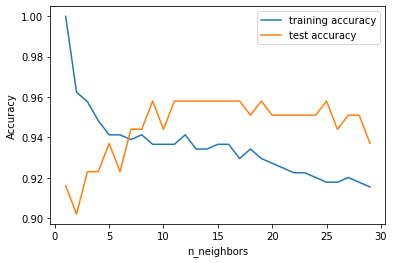

In [11]:
import matplotlib.pyplot as plt

# hyerparameter tuning
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  #training the model
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
  
# these types of charts are very important!! how does the test/training accuracy vary with a change in a hyperparameter

In [12]:
from sklearn.tree import DecisionTreeClassifier



In [13]:
model = DecisionTreeClassifier(max_depth = 7)

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
# relatively low performance on test
model.score(X_test,y_test)

0.9230769230769231

In [16]:
# 100% on training data
model.score(X_train,y_train)

# Trees overfit completely the data


0.9976525821596244

In [17]:
# why dont I repeat the process but choose the max_depth of the tree
max_depth = range(1,100)
test = []
train = []

for depth in max_depth:
  model = DecisionTreeClassifier(max_depth= depth)
  model.fit(X_train, y_train)
  test.append(model.score(X_test,y_test))
  train.append(model.score(X_train,y_train))



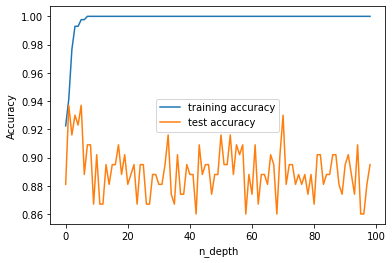

In [18]:
import matplotlib.pyplot as plt
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

# we quickly see underfitting properties

In [19]:
!pip install mglearn

     |████████████████████████████████| 542kB 8.1MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=8310c5eeb712c95a2a0d3cdbc2b86d8d22eddf1b58f92b3627702b2eb2500663
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


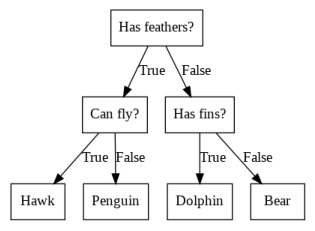

In [20]:
import mglearn
mglearn.plots.plot_animal_tree()

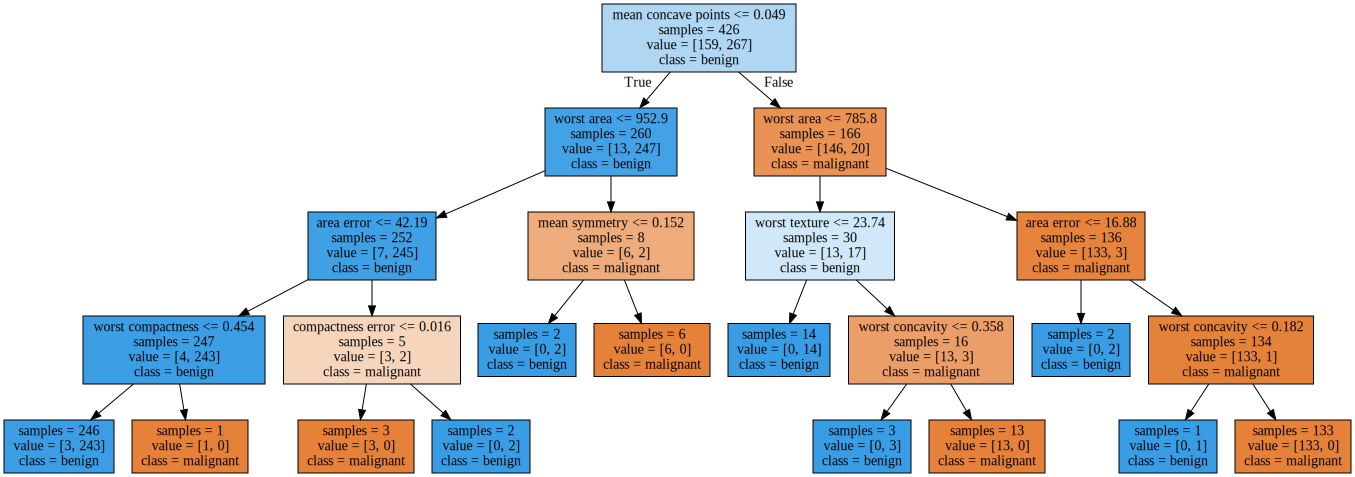

In [23]:
# visualizing your decision trees
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(model, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)  

In [22]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72099985, 0.        , 0.        ,
       0.        , 0.        , 0.02007711, 0.01727487, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0124106 ,
       0.        , 0.05097828, 0.        , 0.11722141, 0.        ,
       0.0100506 , 0.03547403, 0.        , 0.        , 0.01551325])

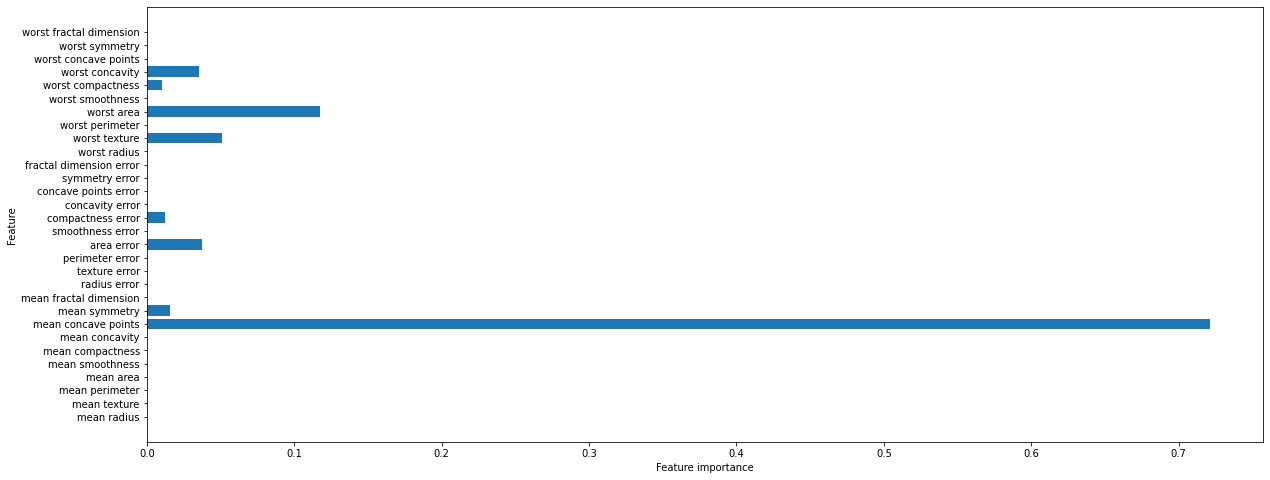

In [24]:
# this code helps you plot the feature importance!
import numpy as np
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
plt.figure(num=None, figsize=(20,8))
plot_feature_importances_cancer(model)

In [26]:
# Support Vector Machine

from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(X_train, y_train)


print(model.score(X_train, y_train))
print(model.score(X_test, y_test))



0.8802816901408451
0.8601398601398601


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
# logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

model = LogisticRegression()

In [29]:
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.9460093896713615
0.9440559440559441


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9460093896713615
0.9440559440559441


In [31]:
# build confusion matrix based on last example -> logistic regression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report 


In [33]:
confusion_matrix(model.predict(X_test),y_test)

array([[51,  6],
       [ 2, 84]])

In [38]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.98      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [34]:
# Applying an example of cross validation

from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC

model = LinearSVC( C = 1, random_state = 0)

results = cross_validate(model,cancer['data'], cancer['target'], cv = 10)



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [35]:

results['test_score']

array([0.9122807 , 0.94736842, 0.94736842, 0.94736842, 0.84210526,
       0.94736842, 0.96491228, 0.92982456, 0.9122807 , 0.91071429])

In [36]:
results['test_score'].mean()

0.9261591478696742

In [41]:
#Extraaaaaaa
# cool example showing importance of feature engineering/ coordinates system
#use this as a starter

x1 = np.arange(-10,10)
x2 = np.arange(-10, 10)

y1 = np.cos(x1)
y2 = np.sin(x1)

import pandas as pd
data = pd.DataFrame([y1,y2]).T

In [42]:
data['target'] = 'red'
data.head()

,0,1,target
0,-0.839072,0.544021,red
1,-0.911130,-0.412118,red
2,-0.145500,-0.989358,red
3,0.753902,-0.656987,red
4,0.960170,0.279415,red


In [43]:
y1 = 3*np.cos(x1)
y2 = 3*np.sin(x1)

data2 = pd.DataFrame([y1,y2]).T
data2['target'] = 'blue'
data2.head()

,0,1,target
0,-2.517215,1.632063,blue
1,-2.733391,-1.236355,blue
2,-0.436500,-2.968075,blue
3,2.261707,-1.970960,blue
4,2.880511,0.838246,blue


In [44]:
final = pd.concat([data,data2])
final.head()

,0,1,target
0,-0.839072,0.544021,red
1,-0.911130,-0.412118,red
2,-0.145500,-0.989358,red
3,0.753902,-0.656987,red
4,0.960170,0.279415,red


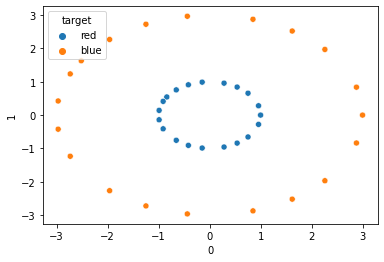

In [45]:
import seaborn as sns

sns.scatterplot(x = final[0], y = final[1], hue = final['target'])